<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/development/permits_by_area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **Data**

In [16]:
df = pd.read_excel('permits_cust.xlsx', skiprows=5)
df = df[['Unnamed: 0', 'Total.1', 'Total.2', 'Total.3', 'Total.4']]
df.columns = ['Date', 'Northeast', 'Midwest', 'South', 'West']
df.dropna(inplace=True)
df.head()

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Date  Northeast  Midwest  South   West
0  1959      222.0    286.0  356.0  344.0
1  1960      199.1    228.0  284.1  286.3
2  1961      229.4    226.1  299.4  309.4
3  1962      242.5    238.3  342.8  363.0
4  1963      239.4    268.8  403.2  423.3

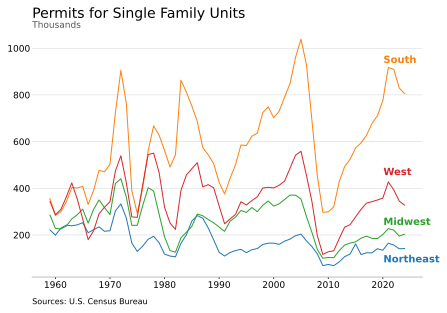

In [39]:

# --- NYT-style colors ---
line_color     = "#1f77b4"  # medium/light blue (main line)
fill_color     = "#e6f1fb"  # very pale blue fill
forecast_fill  = "#99c2e6"  # medium sky blue for forecast shading
grid_color     = "lightgray"  # nearly white with a blue tint for grid

colors = {
    "Northeast": "#1f77b4",  # blue
    "Midwest":   "#2ca02c",  # green
    "South":     "#ff7f0e",  # orange
    "West":      "#d62728",  # red
}

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
#ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(df['Date'], df['Northeast'], color=colors["Northeast"], linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

ax.plot(df['Date'], df['Midwest'], color=colors["Midwest"], linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

ax.plot(df['Date'], df['South'], color=colors["South"], linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

ax.plot(df['Date'], df['West'], color=colors["West"], linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Permits for Single Family Units', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Thousands", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Sources: U.S. Census Bureau",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

ax.annotate("South",
        xy = (0.9, 0.87),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=10,
        weight='bold',
        color=colors["South"])


ax.annotate("Northeast",
        xy = (0.9, 0.07),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=10,
        weight='bold',
        color=colors["Northeast"])

ax.annotate("Midwest",
        xy = (0.9, 0.22),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=10,
        weight='bold',
        color=colors["Midwest"])

ax.annotate("West",
        xy = (0.9, 0.42),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=10,
        weight='bold',
        color=colors["West"])

fig.savefig("permits_by_area.png", bbox_inches="tight", dpi=300)
plt.show()

In [ ]:
start, end = dt.datetime(1960, 1, 1), dt.datetime(2025, 6, 30)

# Federal Funds Rate (Effective)
df1 = web.DataReader("PERMIT1", "fred", start, end)
df2 = web.DataReader("PERMIT5", "fred", start, end)
df3 = web.DataReader("PERMIT24", "fred", start, end)
df = df1.join([df2, df3], how='inner')
df.head()

PERMIT1  PERMIT5  PERMIT24
DATE                                  
1960-01-01      846      179        67
1960-02-01      868      149        71
1960-03-01      729      166        60
1960-04-01      778      181        57
1960-05-01      758      231        63

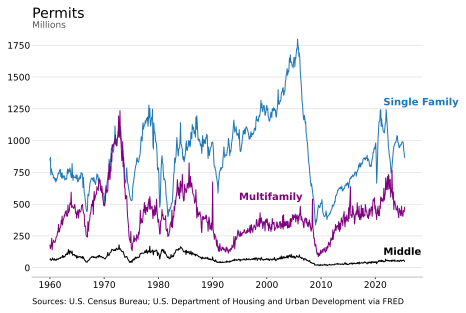

In [ ]:


# --- NYT-style colors ---
line_color     = "#1f77b4"  # medium/light blue (main line)
fill_color     = "#e6f1fb"  # very pale blue fill
forecast_fill  = "#99c2e6"  # medium sky blue for forecast shading
grid_color     = "lightgrey"  # nearly white with a blue tint for grid

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=4)
ax.plot(df.index, df['PERMIT1'], color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

ax.plot(df.index, df['PERMIT5'], color='purple', linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

ax.plot(df.index, df['PERMIT24'], color='black', linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")


# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Permits', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Millions", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Sources: U.S. Census Bureau; U.S. Department of Housing and Urban Development via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

ax.annotate("Single Family",
        xy = (0.9, 0.7),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=10,
        weight='bold',
        color=line_color)

ax.annotate("Multifamily",
        xy = (0.53, 0.32),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=10,
        weight='bold',
        color='purple')


ax.annotate("Middle",
        xy = (0.9, 0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=10,
        weight='bold',
        color='black')

fig.savefig("kinds_permits.png", bbox_inches="tight", dpi=300)
plt.show()